# Linear Regression
- if dimension (number f features) is high then linear models work better.

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
X = fetch_california_housing().data
y = fetch_california_housing().target  # median value
f_names = fetch_california_housing().feature_names

In [ ]:
f_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## Only one feature: MedInc

In [ ]:
X.shape

(20640, 8)

In [ ]:
# X[row_index, col_index ]
X_medinc = X[ :  , 0]  # allthe rows in the first column (index 0 column)
X_medinc

array([8.3252, 8.3014, 7.2574, ..., 1.7   , 1.8672, 2.3886])

In [ ]:
X_medinc.shape

(20640,)

In [ ]:
# input should be two dimensional
X_medinc = X_medinc.reshape(-1,1)
X_medinc.shape

(20640, 1)

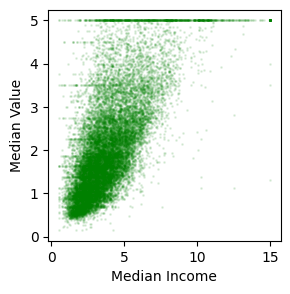

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.scatter(X_medinc, y, s=1, c='g', alpha=0.1)
plt.xlabel('Median Income')
plt.ylabel('Median Value');

### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_medinc_train, X_medinc_test, y_train, y_test = train_test_split( X_medinc, y, random_state=0)

In [ ]:
X_medinc_train.shape, X_medinc_test.shape

((15480, 1), (5160, 1))

In [ ]:
y_train.shape, y_test.shape

((15480,), (5160,))

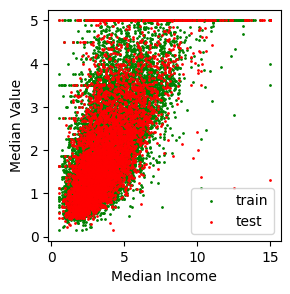

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.scatter(X_medinc_train, y_train, s=1, c='g', label='train')
plt.scatter(X_medinc_test, y_test, s=1, c='r', label='test')
plt.xlabel('Median Income')
plt.ylabel('Median Value')
plt.legend();

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
# training
lin_reg.fit(X_medinc_train, y_train)

LinearRegression()

In [ ]:
# slope
m = lin_reg.coef_[0]
m

0.4227345692439771

In [ ]:
# y intercept
b = lin_reg.intercept_
b

0.43642774209171264

In [ ]:
# (x1, y1)   and (x2, y2)
x1 = 0
x2 = 10
y1 = m*x1+b
y2 = m*x2+b

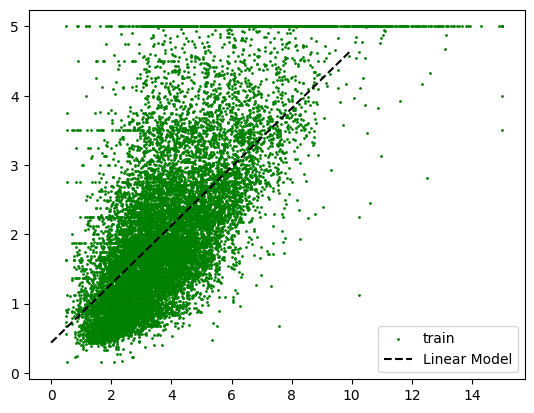

In [ ]:
plt.scatter(X_medinc_train, y_train, s=1, c='g', label='train')
plt.plot( [x1, x2], [y1, y2], c='k', label='Linear Model', linestyle='--')
plt.legend();

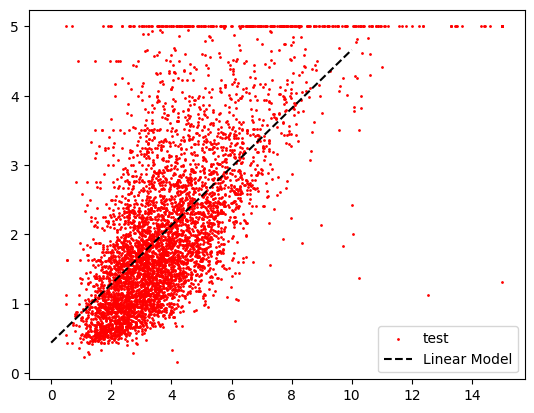

In [ ]:
plt.scatter(X_medinc_test, y_test, s=1, c='r', label='test')
plt.plot( [x1, x2], [y1, y2], c='k', label='Linear Model', linestyle='--')
plt.legend();

In [ ]:
lin_reg.score(X_medinc_train, y_train)

0.48061930819884535

In [ ]:
lin_reg.score(X_medinc_test, y_test)

0.45125914622544183

### knn

In [ ]:
# baseline
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_medinc_train, y_train)
print(f'knn Training Score: {knn.score(X_medinc_train, y_train)}')
print(f'knn Test     Score: {knn.score(X_medinc_test , y_test)}')

knn Training Score: 0.5646130307997881
knn Test     Score: 0.39284611498315714


## Multiple Feature

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((15480, 8), (5160, 8))

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
lin_reg.coef_

array([ 4.39091042e-01,  9.59864665e-03, -1.03311173e-01,  6.16730152e-01,
       -7.63275197e-06, -4.48838256e-03, -4.17353284e-01, -4.30614462e-01])

In [ ]:
lin_reg.intercept_

-36.609593778714334

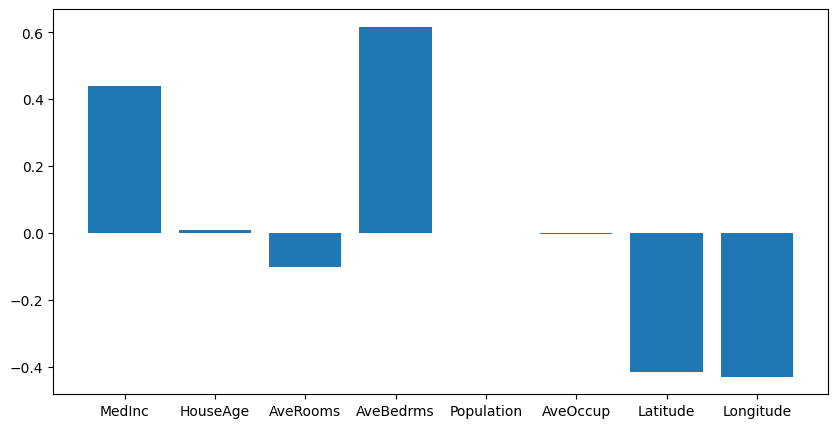

In [ ]:
# high coef ---> high feature importance
plt.figure(figsize=(10,5))
plt.bar( f_names,  lin_reg.coef_);

In [ ]:
lin_reg.score(X_train, y_train)

0.6109633715458153

In [ ]:
lin_reg.score(X_test, y_test)

0.5911695436410476

In [ ]:
# baseline
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print(f'knn Training Score: {knn.score(X_train, y_train)}')
print(f'knn Test     Score: {knn.score(X_test , y_test)}')

knn Training Score: 0.5713267568740368
knn Test     Score: 0.11587927803940512


# Decision Trees

In [ ]:
from sklearn.datasets import load_iris
X_iris = load_iris().data
y_iris = load_iris().target
f_names = load_iris().feature_names
t_names = load_iris().target_names

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split( X_iris, y_iris, random_state=0)

In [ ]:
X_iris_train.shape

(112, 4)

In [ ]:
t_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
import pandas as pd
df = pd.DataFrame(X_iris_train, columns=f_names)
df['Target'] = y_iris_train
df['Target-2'] = [t_names[i]   for i in y_iris_train]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target-2
0,5.9,3.0,4.2,1.5,1,versicolor
1,5.8,2.6,4.0,1.2,1,versicolor
2,6.8,3.0,5.5,2.1,2,virginica
3,4.7,3.2,1.3,0.2,0,setosa
4,6.9,3.1,5.1,2.3,2,virginica


In [ ]:
df.shape

(112, 6)

In [ ]:
df['Target-2'].value_counts()

virginica     41
setosa        37
versicolor    34
Name: Target-2, dtype: int64

In [ ]:
df[df['petal length (cm)'] <= 2.35].shape

(37, 6)

In [ ]:
df[df['petal length (cm)'] <= 2.35]['Target-2'].value_counts()

setosa    37
Name: Target-2, dtype: int64

In [ ]:
df[df['petal length (cm)'] > 2.35].shape

(75, 6)

In [ ]:
df[df['petal length (cm)'] > 2.35]['Target-2'].value_counts()

virginica     41
versicolor    34
Name: Target-2, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_iris_train, y_iris_train)

DecisionTreeClassifier(max_depth=2)

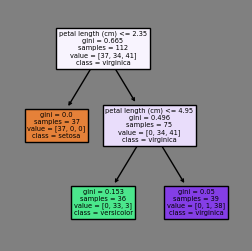

In [ ]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(3, 3), facecolor='gray')
tree.plot_tree(dt, filled=True, class_names=t_names, feature_names=f_names, ax=ax);

## DT Regressor

In [ ]:
# california housing data
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [ ]:
print(f'DT Regressor Training Score: {dt.score(X_train, y_train)}')
print(f'DT Regressor Test     Score: {dt.score(X_test , y_test)}')

DT Regressor Training Score: 0.8369838179078153
DT Regressor Test     Score: 0.6765851892719097


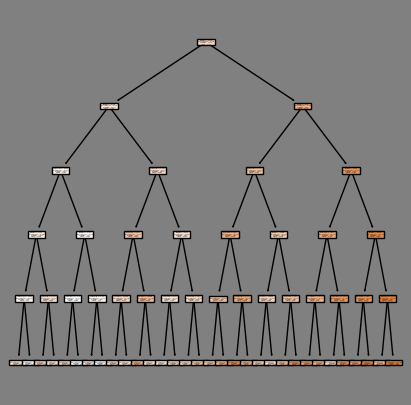

In [ ]:
fig, ax = plt.subplots(figsize=(5,5), facecolor='gray')
tree.plot_tree(dt, filled=True,  feature_names=fetch_california_housing().feature_names, ax=ax);

# Random Forest

In [ ]:
# california housing
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print(f'RF Regressor Training Score: {rf.score(X_train, y_train)}')
print(f'RF Regressor Test     Score: {rf.score(X_test , y_test)}')

RF Regressor Training Score: 0.9727159677969947
RF Regressor Test     Score: 0.7941678302821006


In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)
print(f'RF Regressor Training Score: {rf.score(X_train, y_train)}')
print(f'RF Regressor Test     Score: {rf.score(X_test , y_test)}')

RF Regressor Training Score: 0.4712841652551669
RF Regressor Test     Score: 0.4431371070664515


In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)
rf.fit(X_train, y_train)
print(f'RF Regressor Training Score: {rf.score(X_train, y_train)}')
print(f'RF Regressor Test     Score: {rf.score(X_test , y_test)}')

RF Regressor Training Score: 0.5701288086129762
RF Regressor Test     Score: 0.5373907882040071


In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=0)
rf.fit(X_train, y_train)
print(f'RF Regressor Training Score: {rf.score(X_train, y_train)}')
print(f'RF Regressor Test     Score: {rf.score(X_test , y_test)}')

RF Regressor Training Score: 0.6331509419929674
RF Regressor Test     Score: 0.5950137569433269


In [ ]:
train_score, test_score = [], []
for md in range(1,21):
  rf = RandomForestRegressor(n_estimators=50, max_depth=md, random_state=0)
  rf.fit(X_train, y_train)
  train_score.append(rf.score(X_train, y_train))
  test_score.append(rf.score(X_test , y_test))

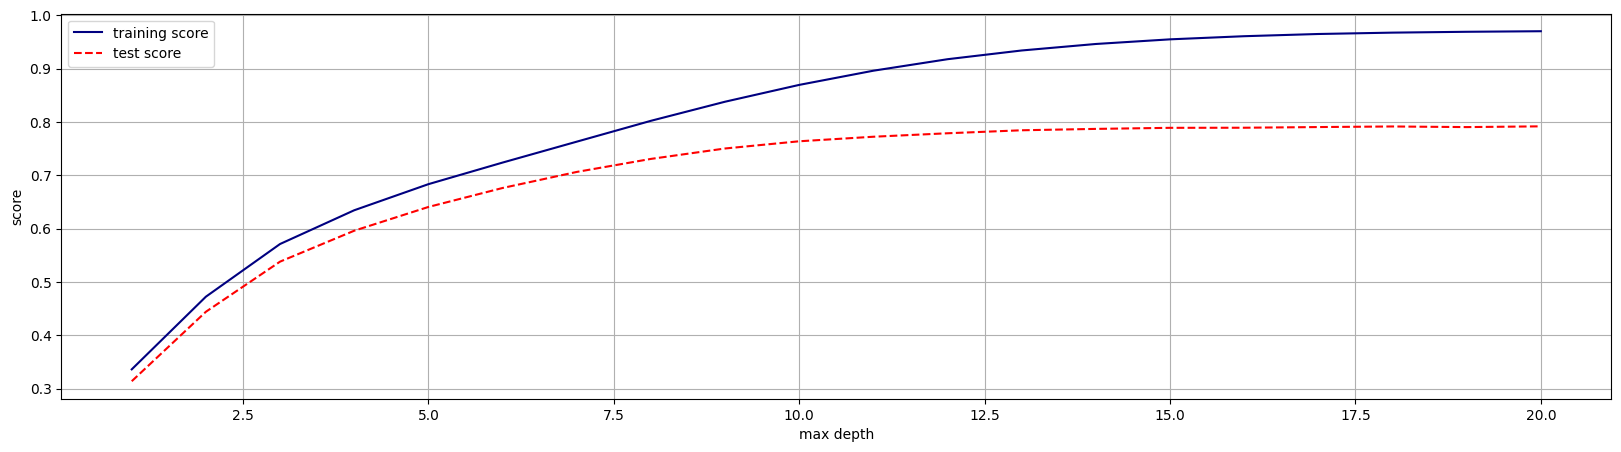

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(range(1,21), train_score, label='training score', c='navy')
plt.plot(range(1,21), test_score , label='test score',     c='r', linestyle='--')
plt.xlabel('max depth')
plt.ylabel('score')
plt.legend()
plt.grid();

# Appendix

## reshape()

In [ ]:
# example about reshape
import numpy as np
myarray = np.array([ [1,2,3,4], [5,6,7,8]    ])
myarray

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
myarray.shape

(2, 4)

In [ ]:
myarray.reshape(4,2)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
myarray.reshape(8,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [ ]:
myarray.reshape(1,8)

array([[1, 2, 3, 4, 5, 6, 7, 8]])

In [ ]:
myarray.reshape(4,-1)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
myarray.reshape(-1,8)

array([[1, 2, 3, 4, 5, 6, 7, 8]])